In [81]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q /content/drive/MyDrive/datasets/Tomato.zip

In [66]:
train_ds = image_dataset_from_directory(
    '/content/Tomato/Model_1_Healthy_Vs_Blight',
    image_size=(256, 256),
    batch_size=32,
    seed=42,
    validation_split=0.2,
    subset='training',
    label_mode='binary'
)

val_ds = image_dataset_from_directory(
    '/content/Tomato/Model_1_Healthy_Vs_Blight',
    image_size=(256, 256),
    batch_size=32,
    seed=42,
    validation_split=0.2,
    subset='validation',
    label_mode='binary'
)

Found 3883 files belonging to 2 classes.
Using 3107 files for training.
Found 3883 files belonging to 2 classes.
Using 776 files for validation.


In [67]:
train_ds.class_names, val_ds.class_names

(['Tomato_Blight', 'Tomato_healthy'], ['Tomato_Blight', 'Tomato_healthy'])

In [68]:
model1 = Sequential()

model1.add(layers.Input(shape=(256,256,3)))
model1.add(layers.Rescaling(1./255))

# Convolutional and pooling layers
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

# Dense Layers
model1.add(Dense(64, activation='relu'))

# Output
model1.add(Dense(1, activation='sigmoid'))

model1.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [69]:
model1.input_shape

(None, 256, 256, 3)

In [70]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 246016)           

In [71]:
h = model1.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
98/98 [==============================] - 11s 94ms/step - loss: 0.6590 - accuracy: 0.8217 - val_loss: 0.1055 - val_accuracy: 0.9639
Epoch 2/5
98/98 [==============================] - 11s 107ms/step - loss: 0.1447 - accuracy: 0.9459 - val_loss: 0.1632 - val_accuracy: 0.9394
Epoch 3/5
98/98 [==============================] - 9s 90ms/step - loss: 0.0942 - accuracy: 0.9691 - val_loss: 0.0669 - val_accuracy: 0.9729
Epoch 4/5
98/98 [==============================] - 9s 93ms/step - loss: 0.0346 - accuracy: 0.9903 - val_loss: 0.0564 - val_accuracy: 0.9742
Epoch 5/5
98/98 [==============================] - 11s 106ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.1284 - val_accuracy: 0.9588


Prompted CHAT-GPT 4 to help grab the labels information from the validation dataset and get it into a numpy array, so that we can use that to make a confusion matrix.

In [72]:
# Collect true labels from val_ds
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Convert list to numpy array
y_true_classes = np.array(true_labels).astype(int).flatten()

# Predict on val_ds
predictions = model1.predict(val_ds)

# Apply threshold to get class predictions
y_pred_classes = (predictions > 0.5).astype(int).flatten()

25/25 [==============================] - 1s 33ms/step


In [73]:
y_true_classes

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [74]:
y_pred_classes

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [51]:
train_ds.class_names

['Tomato_Blight', 'Tomato_healthy']

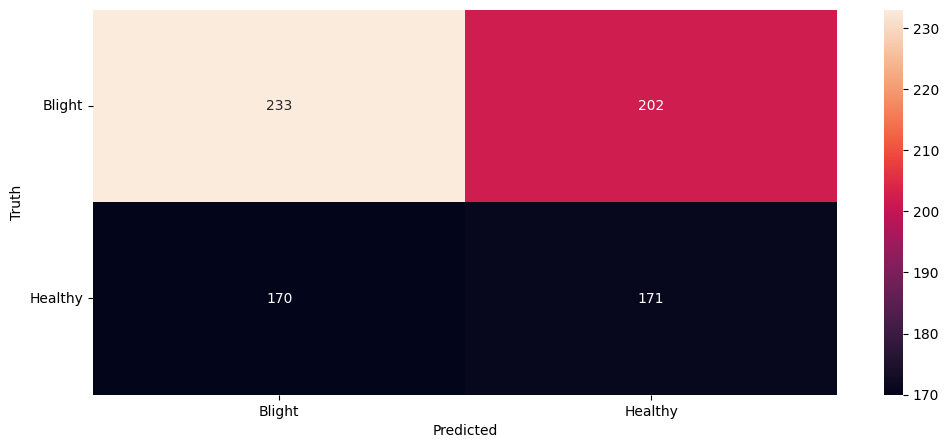

In [75]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

fig, ax = plt.subplots(figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d')

ax.set_yticklabels(['Blight', 'Healthy'], rotation=0, va="center")
ax.set_xticklabels(['Blight', 'Healthy'], rotation=0, ha="center")

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [77]:
def scores(y_test, preds):
    '''
    This function will be used to evaluate the scores of our model.
    '''
    print(f'Recall Score: {recall_score(y_test, preds)}')
    print(f'F1 score: {f1_score(y_test, preds)}')
    print(f'precision score: {precision_score(y_test, preds)}')
    print(f'accuracy score: {accuracy_score(y_test, preds)}')

In [78]:
scores(y_true_classes, y_pred_classes)

Recall Score: 0.501466275659824
F1 score: 0.4789915966386554
precision score: 0.4584450402144772
accuracy score: 0.520618556701031


In [82]:
metrics.binary_accuracy(y_true_classes, y_pred_classes, threshold=0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.52061856>

In [85]:
model.save('TomatoModel.h5')